In [ ]:
###################################
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_markdown
# Directorio del script actual
current_dir = os.getcwd()
url = os.path.join(current_dir, "../data/raw/Sports_Dataset.csv")
data = pd.read_csv(url)
data.head()

PlayerID      Name  Age  Height_cm  Weight_kg       Sport  Matches_Played  \
0         1  Player_1   40        166        100      Tennis              68   
1         2  Player_2   39        164         86    Swimming              25   
2         3  Player_3   38        175         83      Tennis              88   
3         4  Player_4   31        160         82   Athletics              67   
4         5  Player_5   37        191         96  Basketball              14   

   Wins  Losses  Goals_Scored  Assists  Injuries  Training_Hours_per_Week  \
0    50      47             6       15         1                       11   
1    34      22            48       19         2                        7   
2    71      55            41       20         0                        6   
3    60      76             1       23         3                       13   
4    27      97             6        5         5                       17   

  Nationality  Contract_Value_Million  Sponsorships_Million  \
0       Spain                   14.44                  3.56   
1      Brazil                   19.81                  2.15   
2      Brazil                    7.36                  0.51   
3         USA                   15.89                  3.30   
4         USA                    5.35                  3.46   

   Performance_Rating  
0                6.84  
1                3.89  
2                3.00  
3                1.81  
4                8.84

In [106]:
# DEFINIR EL PROBLEMA: POR DEFECTO LISTAS VACÍAS
target = "Performance_Rating"    # el target u objetivo del modelo
categorical_variable = ["Sport"]    # Variables categóricas
drop_columns = ["PlayerID", "Name", "Nationality"] # columnas para hacer drop por falta de relevancia
factors_associated_target = ["Sport"]   # factores asociados al target. Relación del target con las predictoras


In [107]:
# Obtener las dimensiones
data.shape

(500, 17)

In [108]:
# Obtener información sobre tipos de datos y valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PlayerID                 500 non-null    int64  
 1   Name                     500 non-null    object 
 2   Age                      500 non-null    int64  
 3   Height_cm                500 non-null    int64  
 4   Weight_kg                500 non-null    int64  
 5   Sport                    500 non-null    object 
 6   Matches_Played           500 non-null    int64  
 7   Wins                     500 non-null    int64  
 8   Losses                   500 non-null    int64  
 9   Goals_Scored             500 non-null    int64  
 10  Assists                  500 non-null    int64  
 11  Injuries                 500 non-null    int64  
 12  Training_Hours_per_Week  500 non-null    int64  
 13  Nationality              500 non-null    object 
 14  Contract_Value_Million   5

In [109]:
nan = data.isna().sum()
nan

PlayerID                   0
Name                       0
Age                        0
Height_cm                  0
Weight_kg                  0
Sport                      0
Matches_Played             0
Wins                       0
Losses                     0
Goals_Scored               0
Assists                    0
Injuries                   0
Training_Hours_per_Week    0
Nationality                0
Contract_Value_Million     0
Sponsorships_Million       0
Performance_Rating         0
dtype: int64

In [110]:
nan_percentage = data.isna().mean()*100
# Identificar las columnas con más del 90% de NaN y eliminarlas directamente
columns_to_drop = nan[nan_percentage > 90].index
print(columns_to_drop)
# Eliminar las columnas
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

data

Index([], dtype='object')


PlayerID        Name  Age  Height_cm  Weight_kg       Sport  \
0           1    Player_1   40        166        100      Tennis   
1           2    Player_2   39        164         86    Swimming   
2           3    Player_3   38        175         83      Tennis   
3           4    Player_4   31        160         82   Athletics   
4           5    Player_5   37        191         96  Basketball   
..        ...         ...  ...        ...        ...         ...   
495       496  Player_496   36        164         96   Athletics   
496       497  Player_497   29        195        109    Football   
497       498  Player_498   39        161         69    Football   
498       499  Player_499   18        176         64      Tennis   
499       500  Player_500   31        176         79      Tennis   

     Matches_Played  Wins  Losses  Goals_Scored  Assists  Injuries  \
0                68    50      47             6       15         1   
1                25    34      22            48       19         2   
2                88    71      55            41       20         0   
3                67    60      76             1       23         3   
4                14    27      97             6        5         5   
..              ...   ...     ...           ...      ...       ...   
495              17    37     100            48       21         0   
496              35    58      10            11        3         0   
497              59    85      10             2        2         0   
498              52    50      11            21       28         1   
499              33    22      74            27       25         4   

     Training_Hours_per_Week Nationality  Contract_Value_Million  \
0                         11       Spain                   14.44   
1                          7      Brazil                   19.81   
2                          6      Brazil                    7.36   
3                         13         USA                   15.89   
4                         17         USA                    5.35   
..                       ...         ...                     ...   
495                       10       Italy                    9.37   
496                       17       Spain                    9.65   
497                       15     Germany                   15.08   
498                       13         USA                   11.40   
499                        6       Spain                   13.42   

     Sponsorships_Million  Performance_Rating  
0                    3.56                6.84  
1                    2.15                3.89  
2                    0.51                3.00  
3                    3.30                1.81  
4                    3.46                8.84  
..                    ...                 ...  
495                  0.12                6.40  
496                  1.70                8.59  
497                  1.94                9.87  
498                  1.75                6.22  
499                  4.48                1.70  

[500 rows x 17 columns]

In [111]:

if(data.duplicated().sum()==0):
    print("No hay duplicados")
elif(data.duplicated().sum() !=0 ):
    print("Si hay duplicados, se procede a eliminarlos")

No hay duplicados


In [112]:
# ELIMINAR DUPLICADOS, ESPECIFICAR CON .difference(["columna"] SI ES NECESARIO
data = data.drop_duplicates(subset = data.columns)
print(data.shape)
data.head()

(500, 17)


PlayerID      Name  Age  Height_cm  Weight_kg       Sport  Matches_Played  \
0         1  Player_1   40        166        100      Tennis              68   
1         2  Player_2   39        164         86    Swimming              25   
2         3  Player_3   38        175         83      Tennis              88   
3         4  Player_4   31        160         82   Athletics              67   
4         5  Player_5   37        191         96  Basketball              14   

   Wins  Losses  Goals_Scored  Assists  Injuries  Training_Hours_per_Week  \
0    50      47             6       15         1                       11   
1    34      22            48       19         2                        7   
2    71      55            41       20         0                        6   
3    60      76             1       23         3                       13   
4    27      97             6        5         5                       17   

  Nationality  Contract_Value_Million  Sponsorships_Million  \
0       Spain                   14.44                  3.56   
1      Brazil                   19.81                  2.15   
2      Brazil                    7.36                  0.51   
3         USA                   15.89                  3.30   
4         USA                    5.35                  3.46   

   Performance_Rating  
0                6.84  
1                3.89  
2                3.00  
3                1.81  
4                8.84

In [113]:
if(drop_columns):   # si drop_columns tiene valores y no está vacío entra
    data = data.drop(drop_columns, axis = 1)
data

Age  Height_cm  Weight_kg       Sport  Matches_Played  Wins  Losses  \
0     40        166        100      Tennis              68    50      47   
1     39        164         86    Swimming              25    34      22   
2     38        175         83      Tennis              88    71      55   
3     31        160         82   Athletics              67    60      76   
4     37        191         96  Basketball              14    27      97   
..   ...        ...        ...         ...             ...   ...     ...   
495   36        164         96   Athletics              17    37     100   
496   29        195        109    Football              35    58      10   
497   39        161         69    Football              59    85      10   
498   18        176         64      Tennis              52    50      11   
499   31        176         79      Tennis              33    22      74   

     Goals_Scored  Assists  Injuries  Training_Hours_per_Week  \
0               6       15         1                       11   
1              48       19         2                        7   
2              41       20         0                        6   
3               1       23         3                       13   
4               6        5         5                       17   
..            ...      ...       ...                      ...   
495            48       21         0                       10   
496            11        3         0                       17   
497             2        2         0                       15   
498            21       28         1                       13   
499            27       25         4                        6   

     Contract_Value_Million  Sponsorships_Million  Performance_Rating  
0                     14.44                  3.56                6.84  
1                     19.81                  2.15                3.89  
2                      7.36                  0.51                3.00  
3                     15.89                  3.30                1.81  
4                      5.35                  3.46                8.84  
..                      ...                   ...                 ...  
495                    9.37                  0.12                6.40  
496                    9.65                  1.70                8.59  
497                   15.08                  1.94                9.87  
498                   11.40                  1.75                6.22  
499                   13.42                  4.48                1.70  

[500 rows x 14 columns]

In [114]:
data.describe()

Age   Height_cm   Weight_kg  Matches_Played        Wins  \
count  500.000000  500.000000  500.000000      500.000000  500.000000   
mean    29.052000  183.538000   84.178000       55.796000   50.698000   
std      6.518149   14.852534   14.218814       26.093987   28.613848   
min     18.000000  160.000000   60.000000       10.000000    0.000000   
25%     24.000000  171.000000   71.000000       33.000000   28.000000   
50%     29.000000  183.000000   84.500000       57.000000   52.000000   
75%     34.250000  195.000000   96.000000       78.250000   74.000000   
max     40.000000  210.000000  110.000000      100.000000  100.000000   

           Losses  Goals_Scored     Assists    Injuries  \
count  500.000000    500.000000  500.000000  500.000000   
mean    52.688000     24.536000   15.350000    2.610000   
std     28.470895     15.243012    9.100392    1.718081   
min      0.000000      0.000000    0.000000    0.000000   
25%     29.000000     11.000000    8.000000    1.000000   
50%     52.500000     25.000000   16.000000    3.000000   
75%     79.000000     38.000000   23.000000    4.000000   
max    100.000000     50.000000   30.000000    5.000000   

       Training_Hours_per_Week  Contract_Value_Million  Sponsorships_Million  \
count               500.000000              500.000000            500.000000   
mean                 12.428000               10.473980              2.423660   
std                   4.638086                5.532891              1.387467   
min                   5.000000                0.530000              0.120000   
25%                   8.000000                6.007500              1.215000   
50%                  12.000000               10.770000              2.290000   
75%                  16.000000               15.055000              3.590000   
max                  20.000000               19.930000              4.990000   

       Performance_Rating  
count          500.000000  
mean             5.575240  
std              2.700669  
min              1.010000  
25%              3.085000  
50%              5.790000  
75%              8.112500  
max              9.980000

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

Variables categóricas

`Performance_Rating` (numérico) :  `Sport`

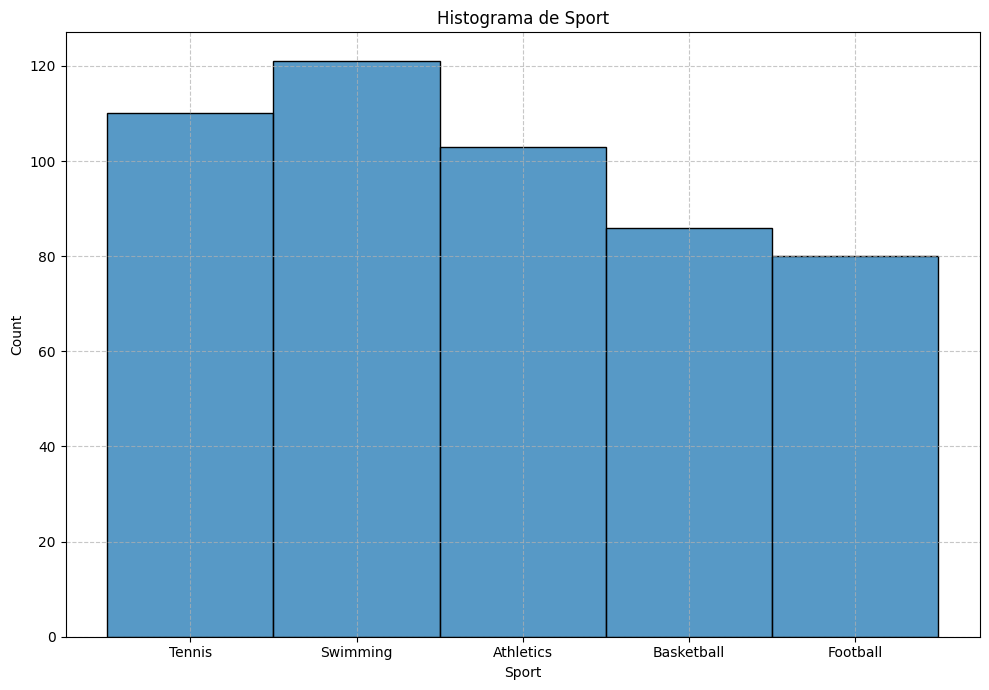

In [115]:
if(categorical_variable):
    fig, axis = plt.subplots(len(categorical_variable), 1,figsize = (10, 7*len(categorical_variable)))

    if len(categorical_variable) == 1:
        axis = [axis]   # convertir en lista para que no me salga error

    for i,col in enumerate(categorical_variable):
        # Crear un histograma múltiple
        sns.histplot( data = data, ax=axis[i], x = col)
        axis[i].set_title(f'Histograma de {col}')
        # grid
        plt.grid(linestyle="--", alpha=0.7)
        # Ajustar el layout
        plt.tight_layout()

        # Mostrar el plot
        plt.show()
else:
    print("categorical_variable está vacío, debe llenarse para poder representarse")

Más o menos todos los deportes tienen el mismo número.

#### Análisis sobre variables numéricas

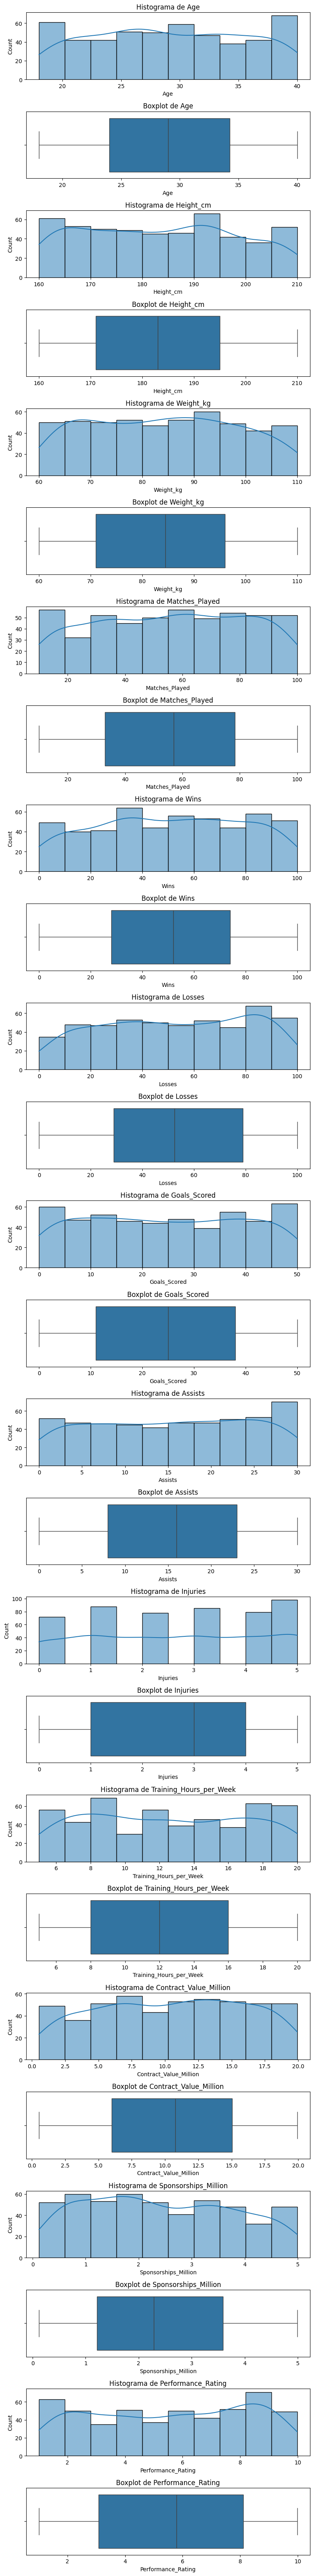

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
# SOLO MODIFICAR COLUMNAS QUE SE QUIERAN EXCLUIR DE LAS NUMERICAS [ NO HACER CASO]
column_filter= data.select_dtypes(include='number').drop(columns=[''], errors='ignore').columns
# Crear la figura con 2 columnas y una fila por variable
fig, axes = plt.subplots(len(column_filter)*2, 1, figsize=(8, len(column_filter) * 5))

# Iterar sobre cada columna del DataFrame
for i, col in enumerate(column_filter):
    idx=i*2
    # Histograma en la primera fila
    sns.histplot(data=data, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histograma de {col}')
    

    # Boxplot en la segunda fila
    sns.boxplot(data=data, x=col, ax=axes[idx+1])
    axes[idx+1].set_title(f'Boxplot de {col}')
    

# Ajustar diseño
plt.tight_layout()
plt.show()

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

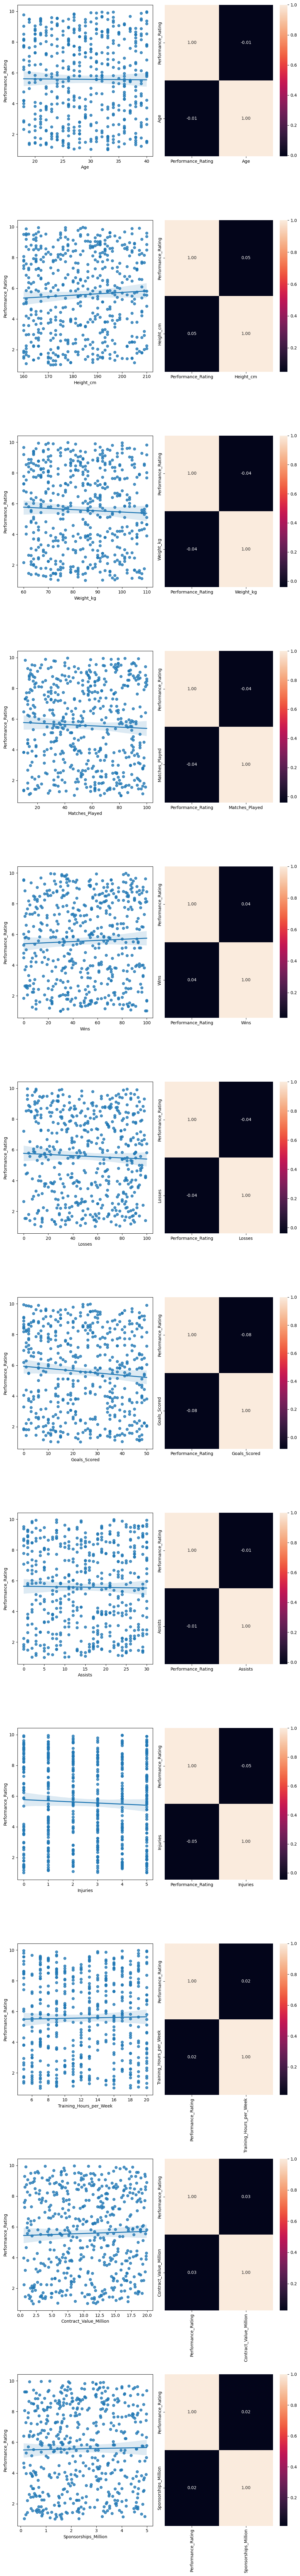

In [117]:
# Automatizado para solo filtrar los numericos a numericos y excluir que  se compare el objetivo o clase a predecir, es decir, price consigo mismo
if(target):
    column_filter= data.select_dtypes(include='number').drop(columns=[target], errors='ignore').columns
    fig, axis = plt.subplots(len(column_filter), 2, figsize = (10, 7*(len(column_filter))))

    # Crear un diagrama de dispersión múltiple
    for i,col in enumerate(column_filter):
        sns.regplot(ax = axis[i, 0], data = data, x = col, y = target)
        sns.heatmap(data[[target, col]].corr(), annot = True, fmt = ".2f", ax = axis[i,1], cbar = True)

    # Ajustar el layout
    plt.tight_layout()

    # Mostrar el plot
    plt.show()
else:
    print(f"target {target} está vacío, se debe especificar el target para poder representar.")

#### Análisis categórico-categórico [NO HAY QUE HACER]

In [118]:
if (target not in categorical_variable):
    print(f"No es necesario hacer el análisis categórico-categórico porque el target objetivo {target} del modelo es una variable numérica.")

No es necesario hacer el análisis categórico-categórico porque el target objetivo Performance_Rating del modelo es una variable numérica.


In [119]:
# fig, axis = plt.subplots(2, 3, figsize = (15, 7))

# sns.countplot(ax = axis[0, 0], data = total_data, x = "Sex", hue = "Survived")
# sns.countplot(ax = axis[0, 1], data = total_data, x = "Pclass", hue = "Survived").set(ylabel = None)
# sns.countplot(ax = axis[0, 2], data = total_data, x = "Embarked", hue = "Survived").set(ylabel = None)
# sns.countplot(ax = axis[1, 0], data = total_data, x = "SibSp", hue = "Survived")
# sns.countplot(ax = axis[1, 1], data = total_data, x = "Parch", hue = "Survived").set(ylabel = None)

# plt.tight_layout()
# fig.delaxes(axis[1, 2])

# plt.show()

In [120]:
data.columns

Index(['Age', 'Height_cm', 'Weight_kg', 'Sport', 'Matches_Played', 'Wins',
       'Losses', 'Goals_Scored', 'Assists', 'Injuries',
       'Training_Hours_per_Week', 'Contract_Value_Million',
       'Sponsorships_Million', 'Performance_Rating'],
      dtype='object')

##### Combinaciones de la clase con varias predictoras

In [121]:
# DESACTIVAR CUANDO YA LO TIENES DEFINIDO
# factors_associated_target = input("Introduce todas las variables predictoras separados por comas que consideres que pueden estar relacionadas con el target")
# factors_associated_target = [x.strip() for x in factors_associated_target.split(",")]

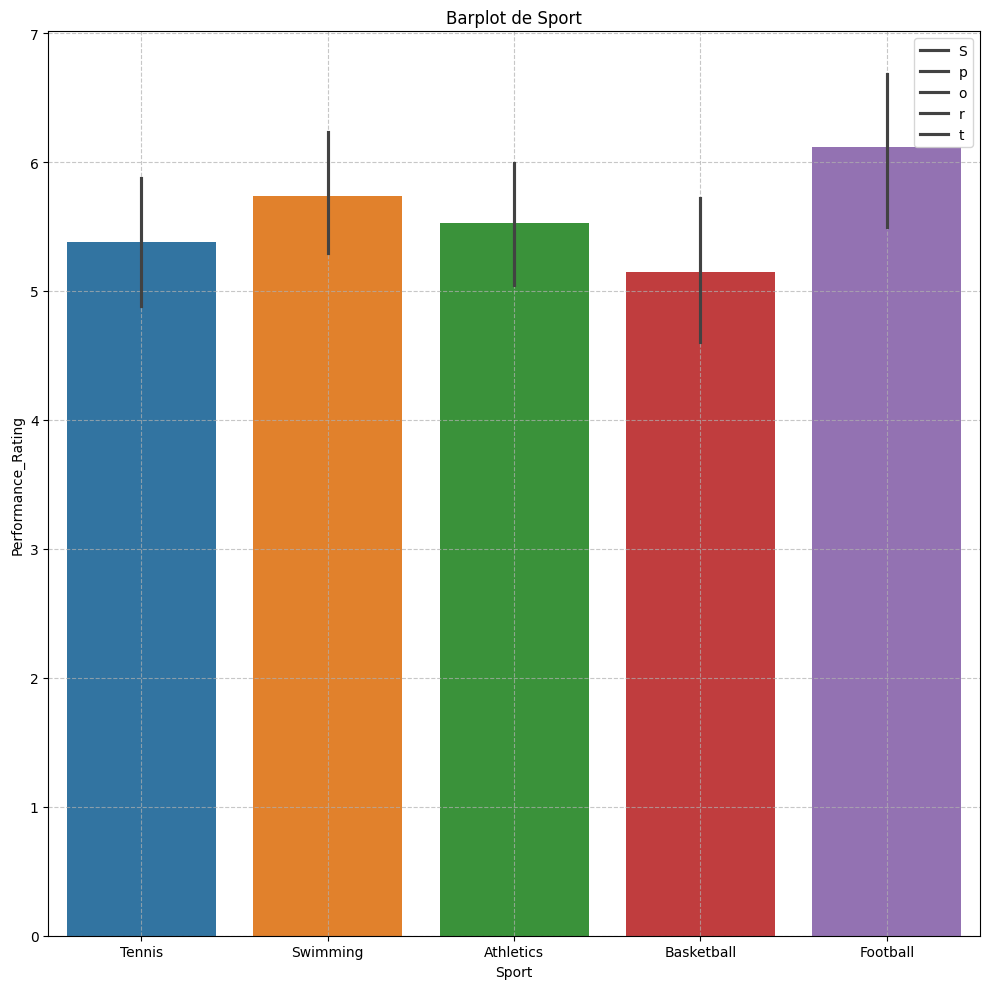

In [122]:
import itertools
import numpy as np
if(categorical_variable):
    fig, axis = plt.subplots(len(categorical_variable), 1, figsize = (10, 10))

    # if len(categorical_variable) == 1 and len(factors_associated_target) == 1:
    #     axis = [axis]   # convertir en lista para que no me salga error
    # Si solo hay un gráfico, convertir axis en una lista
    if not isinstance(axis, (list, np.ndarray)):  
        axis = [axis]

    # Si axis es 2D, aplanarlo
    if isinstance(axis, np.ndarray) and axis.ndim > 1:
        axis = axis.flatten()
        
    for i,(col, factor) in enumerate(itertools.product(categorical_variable,factors_associated_target)):
        
        sns.barplot(ax = axis[i], data = data, x = col, y = target, hue = factor)
        axis[i].set_title(f'Barplot de {col}')
        plt.legend(loc="upper right", labels=factor)
        plt.grid(linestyle="--", alpha=0.7)
        plt.tight_layout()
    plt.show()

else:
    print("categorical_variable está vacío, debe llenarse para poder representarse")

##### Análisis de correlaciones

In [123]:
# Sport
import json

for cat in categorical_variable:

  data[f"{cat}_n"] = pd.factorize(data[cat])[0]

  transformation_rules = {row[cat]: row[f"{cat}_n"] for _, row in data[[cat, f"{cat}_n"]].drop_duplicates().iterrows()}

  with open(f"{cat}_transformation_rules.json", "w") as f:
    json.dump(transformation_rules, f)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:
# 
with open("Sport_transformation_rules.json", "r") as f:
  Sport_transformation_rules = json.load(f)

data["Sport_n"] = data["Sport"].apply(lambda x: Sport_transformation_rules[x])



In [124]:
data

Age  Height_cm  Weight_kg       Sport  Matches_Played  Wins  Losses  \
0     40        166        100      Tennis              68    50      47   
1     39        164         86    Swimming              25    34      22   
2     38        175         83      Tennis              88    71      55   
3     31        160         82   Athletics              67    60      76   
4     37        191         96  Basketball              14    27      97   
..   ...        ...        ...         ...             ...   ...     ...   
495   36        164         96   Athletics              17    37     100   
496   29        195        109    Football              35    58      10   
497   39        161         69    Football              59    85      10   
498   18        176         64      Tennis              52    50      11   
499   31        176         79      Tennis              33    22      74   

     Goals_Scored  Assists  Injuries  Training_Hours_per_Week  \
0               6       15         1                       11   
1              48       19         2                        7   
2              41       20         0                        6   
3               1       23         3                       13   
4               6        5         5                       17   
..            ...      ...       ...                      ...   
495            48       21         0                       10   
496            11        3         0                       17   
497             2        2         0                       15   
498            21       28         1                       13   
499            27       25         4                        6   

     Contract_Value_Million  Sponsorships_Million  Performance_Rating  Sport_n  
0                     14.44                  3.56                6.84        0  
1                     19.81                  2.15                3.89        1  
2                      7.36                  0.51                3.00        0  
3                     15.89                  3.30                1.81        2  
4                      5.35                  3.46                8.84        3  
..                      ...                   ...                 ...      ...  
495                    9.37                  0.12                6.40        2  
496                    9.65                  1.70                8.59        4  
497                   15.08                  1.94                9.87        4  
498                   11.40                  1.75                6.22        0  
499                   13.42                  4.48                1.70        0  

[500 rows x 15 columns]

#### Análisis numérico-categórico (completo)

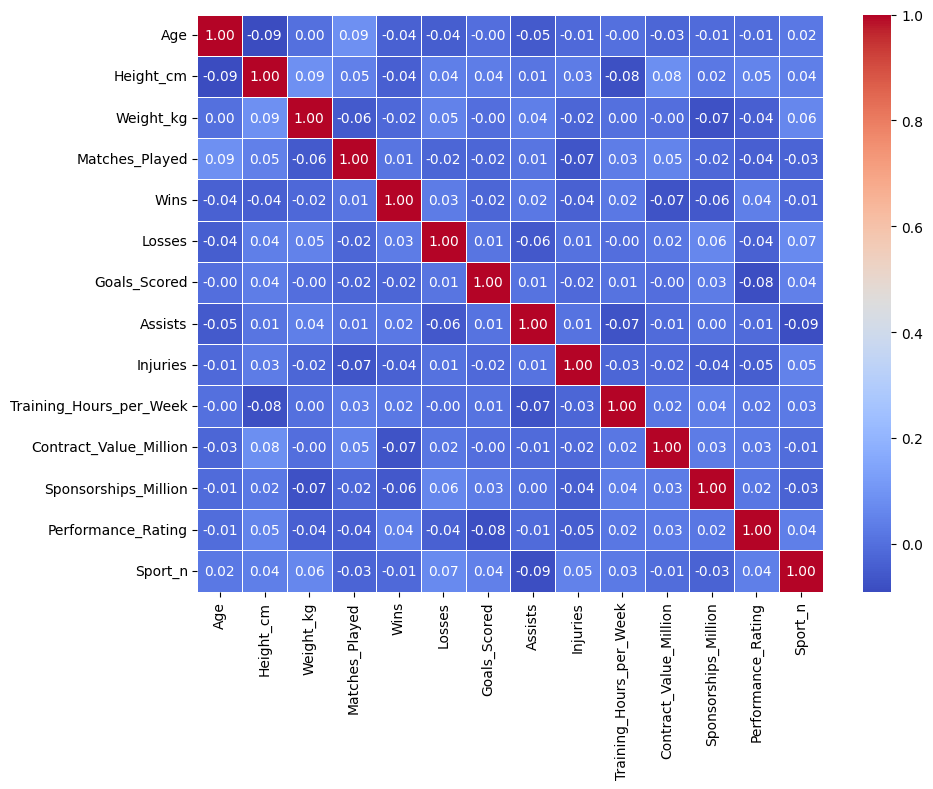

In [125]:
corr_matrix = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.tight_layout()

plt.show()

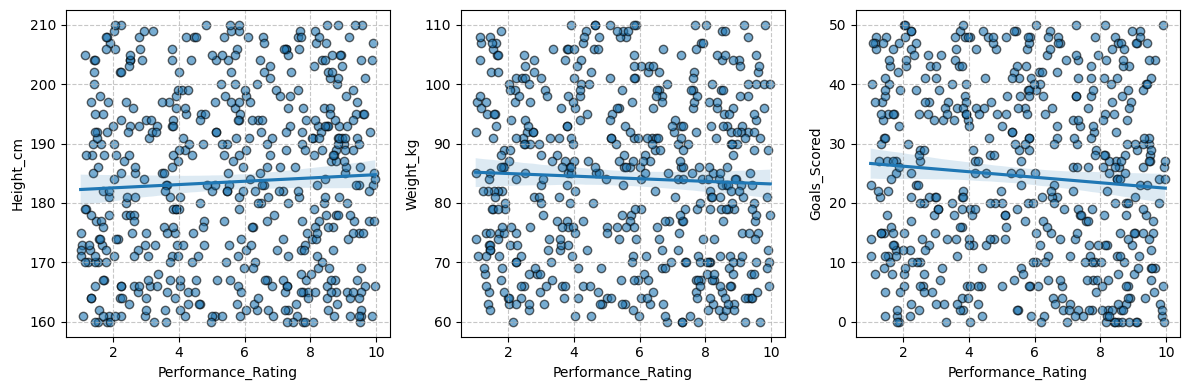

In [126]:
fig, axis = plt.subplots(figsize = (12, 4), ncols = 3)
sns.regplot(ax = axis[0], data = data, x = "Performance_Rating", y = "Height_cm", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data, x = "Performance_Rating", y = "Weight_kg", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[2], data = data, x = "Performance_Rating", y = "Goals_Scored", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)
axis[2].grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

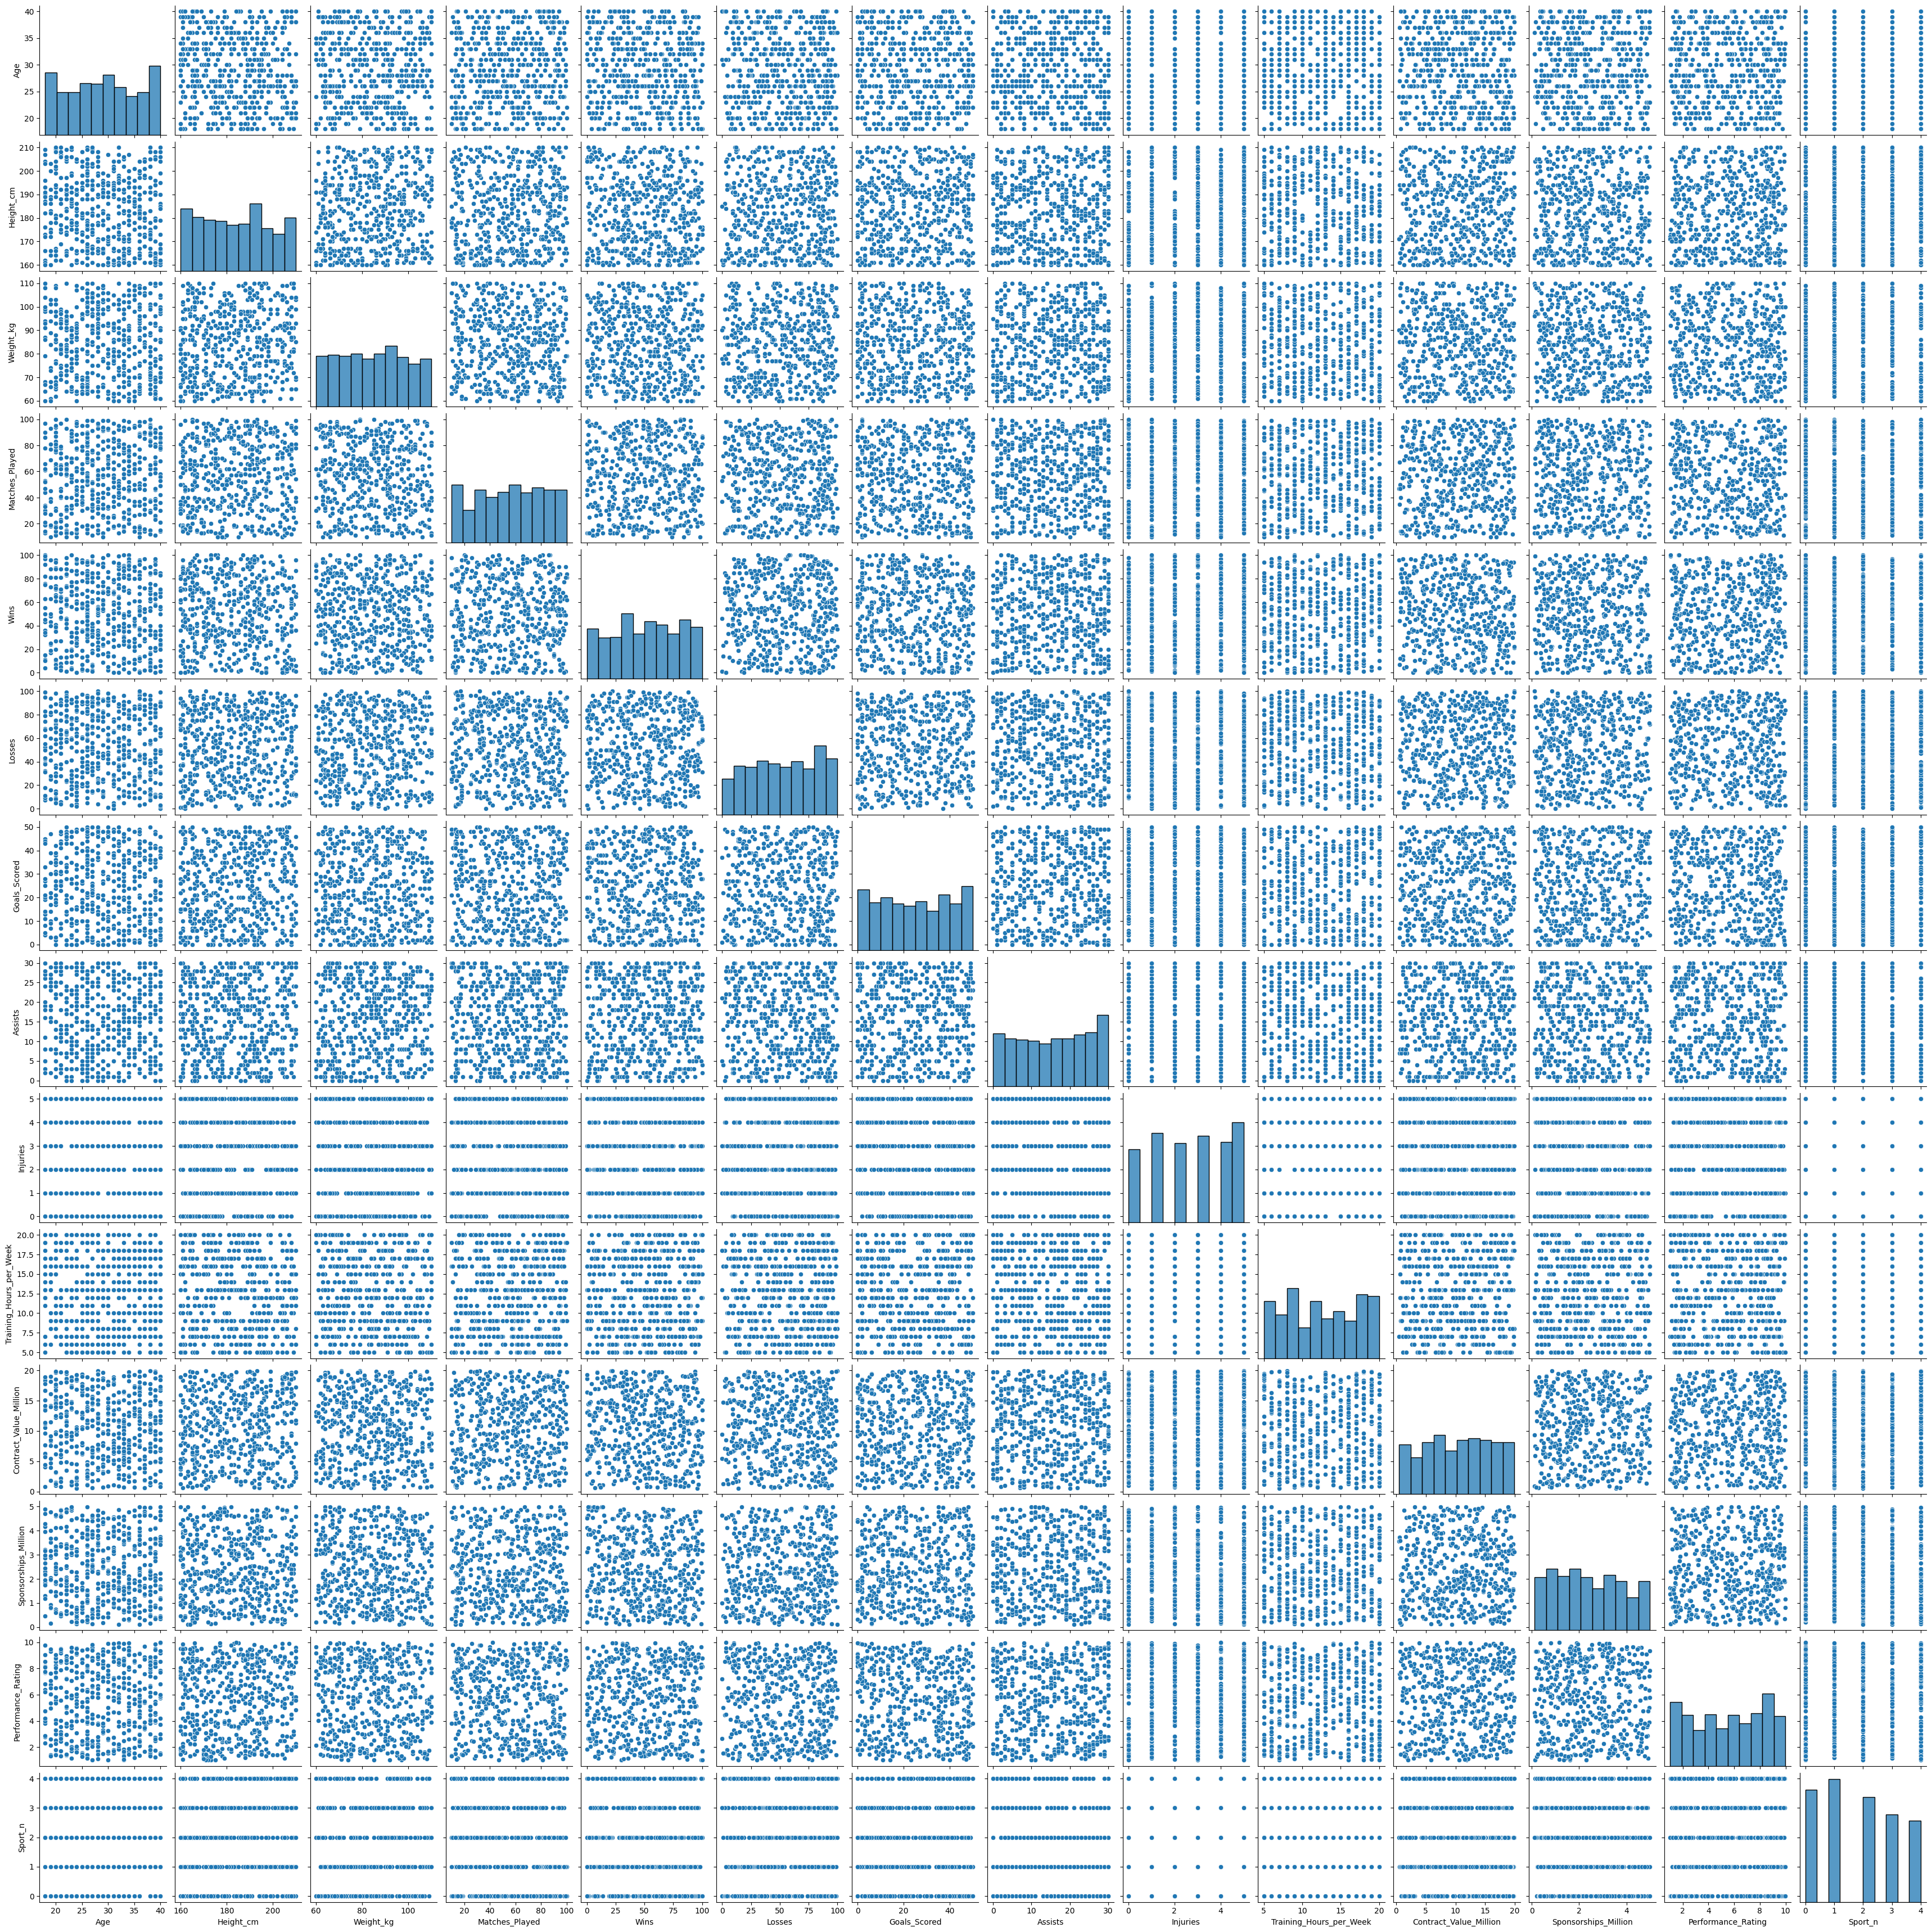

In [127]:
sns.pairplot(data = data)